### Skeleton for HW8
Rename this file and place your code here.

**Note: If a cell begins with HW: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW. This also clearly delineates the sections for me.**

#### HW: For the preamble, leave any general comments here and load all needed modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
colors=sns.color_palette("rocket",10)

**HW 8-1**: Load the data file `concentrations.csv`.  Column `oxygen` is dissolved oxygen concentration in mg/L, as a function of temperature  (column `temperature`) and concentration of chlorine ion (column `chloride`), with temperature given in $^\circ$C, and concentrations in g/L. 

a. Use multilinear regression to derive a predictive equation for dissolved oxygen content as a function of oxygen and chloride. Use the model to estimate the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 $^\circ$C. Compute the $R^2$ and provide an estimate of the standard error $s$ of the model (i.e. the standard de iation of the spread from the line). Use any linear algebra approach.


In [2]:
df = pd.read_csv('concentrations.csv') # load the data file
df.head() # take a look at the pandas dataframe to get an idea of the data structure

,chloride,temperature,oxygen
0,0.0,0.0,12.933
1,0.0,0.5,13.822
2,0.0,1.0,12.967
3,0.0,1.5,12.108
4,0.0,2.0,13.175


https://www.datarobot.com/blog/multiple-regression-using-statsmodels/

In [3]:
x = df[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
y = df['oxygen']                    # dissolved oxygen concentration is our dependent variable 

In [4]:
x = sm.add_constant(x) # add a constant term to serve as the intercept in the linear regression model
linmod = sm.regression.linear_model.OLS(y, x) # perform multilinear regression
linresults = linmod.fit()
print(linresults.summary())

                            OLS Regression Results                            
Dep. Variable:                 oxygen   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2769.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          5.80e-195
Time:                        21:06:38   Log-Likelihood:                -250.57
No. Observations:                 305   AIC:                             507.1
Df Residuals:                     302   BIC:                             518.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.8488      0.077    180.021      

In [5]:
# ChatGPT and the website above used to help in calculating this
predX = pd.DataFrame({'const': 1, 'chloride': 15, 'temperature': 12}, index=[0]) # independent variable values which we want to predict the dependent variable (oxgen conc.) for
predY = linresults.predict(predX)                                                # actually performing the model prediction
print(f'Using the predictive model, the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 degC is approx. {predY[0]:.3f} mg/L')

Using the predictive model, the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 degC is approx. 10.890 mg/L


In [6]:
R2 = linresults.rsquared # R^2 value output by OLS function
print(f'The R^2 calculated by statsmodels.regression.linear_model.OLS is {R2:.3f}')

The R^2 calculated by statsmodels.regression.linear_model.OLS is 0.948


In [7]:
# print(linresults.bse)
print('As calculated by statsmodels.regression.linear_model.OLS:')
print(f'    - The standard error on the constant in the linear model is {linresults.bse[0]:.5f}')
print(f'    - The standard error on the chloride parameter in the linear model is {linresults.bse[1]:.5f}')
print(f'    - The standard error on the temperature parameter in the linear model is {linresults.bse[2]:.5f}')

As calculated by statsmodels.regression.linear_model.OLS:
    - The standard error on the constant in the linear model is 0.07693
    - The standard error on the chloride parameter in the linear model is 0.00448
    - The standard error on the temperature parameter in the linear model is 0.00360


In [8]:
# "manually" compute R^2 of the linear fit
print('Fit quality data for the linear fit')
St_linear = np.sum((y - np.mean(y)) ** 2)
Sr_linear = np.sum(linresults.resid ** 2)

# Linear R^2
r2_linear = (St_linear - Sr_linear) / St_linear

# Compute the error in the estimate
# ChatGPT used to adapt this code from class
s_linear = np.sqrt(Sr_linear / (len(y) - x.shape[1]))

print(f'    - Linear R^2 = {r2_linear:.5f}. Note: this matches the R^2 value calculated by the function (see above)!')
print(f'    - Error in the estimate (linear) = {s_linear:.5f}')

Fit quality data for the linear fit
    - Linear R^2 = 0.94828. Note: this matches the R^2 value calculated by the function (see above)!
    - Error in the estimate (linear) = 0.55296


 b. Construct a model that is up to third order cubic polynomial in temperature and linear in chloride concentration and perform regression to this model (i.e. there will mixed terms involving both temperature and chloride concentration). Use the model to estimate the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 $^\circ$C. Compute the $R^2$ and provide an estimate of the standard error $s$ of the model. Which model do you think may be most useful, and why? 

In [9]:
df = pd.read_csv('concentrations.csv') # reimport the data in case it got overwritten by running cells out of order
x = df[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
y = df['oxygen'] # dependent variable

# ChatGPT credit for helping me to realize I need to add 2nd and 3rd order terms to the x matrix to perform this fit
x['temperature2'] = x['temperature'] ** 2 # add in temp squared term
x['temperature3'] = x['temperature'] ** 3 # add in temp cubic term

x = sm.add_constant(x) # add a constant term to serve as the intercept in the regression model

# same approach as above
polylinmod = sm.regression.linear_model.OLS(y, x)
polylinresults = polylinmod.fit()
print(polylinresults.summary())

                            OLS Regression Results                            
Dep. Variable:                 oxygen   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1520.
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.00e-197
Time:                        21:06:38   Log-Likelihood:                -236.04
No. Observations:                 305   AIC:                             482.1
Df Residuals:                     300   BIC:                             500.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           13.4906      0.122    110.710   

In [10]:
polypredX = pd.DataFrame({'const': 1, 'chloride': 15, 'temperature': 12, 'temperature2': 12**2, 'temperature3': 12**3}, index=[0]) # independent variable values to use in the prediction
polypredY = polylinresults.predict(polypredX) # the prediction!
print(f'Using the polynomial predictive model, the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 °C is approximately {polypredY[0]:.3f} mg/L')

Using the polynomial predictive model, the concentration of dissolved oxygen for a chloride concentration of 15 g/L at T=12 °C is approximately 11.055 mg/L


In [11]:
polyR2 = polylinresults.rsquared # R^2 calculated by OLS
print(f'The R^2 for the polynomial model, ascalculated by statsmodels.regression.linear_model.OLS, is {polyR2:.5f}')

The R^2 for the polynomial model, ascalculated by statsmodels.regression.linear_model.OLS, is 0.95298


In [12]:
# print(polylinresults.bse)
print('As calculated by statsmodels.regression.linear_model.OLS (for the polynomial model fit):')
print(f'    - The standard error on the constant in the model is {polylinresults.bse[0]:.5f}')
print(f'    - The standard error on the chloride parameter in the model is {polylinresults.bse[1]:.5f}')
print(f'    - The standard error on the temperature parameter in the model is {polylinresults.bse[2]:.5f}')
print(f'    - The standard error on the temperature^2 parameter in the model is {polylinresults.bse[3]:.5f}')
print(f'    - The standard error on the temperature^3 parameter in the model is {polylinresults.bse[4]:.5f}')

As calculated by statsmodels.regression.linear_model.OLS (for the polynomial model fit):
    - The standard error on the constant in the model is 0.12185
    - The standard error on the chloride parameter in the model is 0.00428
    - The standard error on the temperature parameter in the model is 0.03320
    - The standard error on the temperature^2 parameter in the model is 0.00258
    - The standard error on the temperature^3 parameter in the model is 0.00006


In [13]:
# "manually" compute R^2 (same approach as above!)
print('Fit quality data')
polySt_linear = np.sum((y - np.mean(y)) ** 2)
polySr_linear = np.sum(polylinresults.resid ** 2)

polyr2_linear = (polySt_linear - polySr_linear) / polySt_linear
polys_linear = np.sqrt(polySr_linear / (len(y) - x.shape[1]))

print(f'    - R^2 = {polyr2_linear:.5f}. Note: this matches the R^2 value calculated by the function (see above).')
print(f'    - Error in the estimate = {polys_linear:.5f}')

Fit quality data
    - R^2 = 0.95298. Note: this matches the R^2 value calculated by the function (see above).
    - Error in the estimate = 0.52899


The larger the R^2 value the better the model is fitting your experimental observations ([source](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)). It's relatively intuitive that we would want a model which minimizes error. Therefore, I think that the polynomial model would be most useful as it has the higher R^2 and lower error in the estimate. With that said, you can see that the parameter estimates on the temperature squared and cubed terms are pretty close to zero, so adding these into the model might add some unnecessarily complexity for not a huge impact on R^2 or error and therefore might not be entirely necessary.

c) Estimate the errors in the parameters of both fits through both standard linear error propagation techniques and via bootstrapping. 

Note on the use of ChatGPT for this part of the problem:
- I was a bit confused what it meant to estimate error through standard linear error propagation, so I asked ChatGPT for input on this part of the problem
- The ChatGPT information wasn't entirely usely, but I believe it helped point me in the right direction for that part of the problem

In [14]:
x = df[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
y = df['oxygen'] # dependent variable
x = sm.add_constant(x) # add a constant term to serve as the intercept in the linear regression model
linmod = sm.regression.linear_model.OLS(y, x)
linresults = linmod.fit()
covLinear = linresults.cov_params()
linParamStdError = np.sqrt(np.diag(covLinear))

print(f'The standard error on the constant in the linear model is {linParamStdError[0]:.5f}')
print(f'The standard error on the chloride parameter in the linear model is {linParamStdError[1]:.5f}')
print(f'The standard error on the temperature parameter in the linear model is {linParamStdError[2]:.5f}')

print('* Note, this matches the bse values printed above which are automatically calculated when calling OLS!')

The standard error on the constant in the linear model is 0.07693
The standard error on the chloride parameter in the linear model is 0.00448
The standard error on the temperature parameter in the linear model is 0.00360
* Note, this matches the bse values printed above which are automatically calculated when calling OLS!


In [15]:
# I had already written bootstrapping code to work for part 2 and used assistance from ChatGPT to adapt that code to work with this application
# ChatGPT gave particularly garbage code here but I was able to use it as guidance to figure out how to make this work...

def linBootstrap(data,ndraws=500):
    '''
    Draw from the boostrap and determining the slope and intercept for each process. 
    '''

    ints = np.zeros(ndraws)
    chlParams = np.zeros(ndraws)
    tempParams = np.zeros(ndraws)

    for i in range(0,ndraws):
        subsample = data.sample(n=data['chloride'].count(), replace=True)
        x = subsample[['chloride', 'temperature']]
        y = subsample['oxygen']
        x = sm.add_constant(x)
        linmod = sm.regression.linear_model.OLS(y, x)
        linresults = linmod.fit()
        params = linresults.params

        ints[i] = params['const']
        chlParams[i] = params['chloride']
        tempParams[i] = params['temperature']

    return ints, chlParams, tempParams

In [16]:
df = pd.read_csv('concentrations.csv')
ints_boot, chlParams_boot, tempParams_boot = linBootstrap(df)

ci = 95
print('mean intercept (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(ints_boot), 
                                                       np.std(ints_boot,ddof=1),ci,
                                                       np.percentile(ints_boot, ((100-ci)/2)),
                                                       np.percentile(ints_boot, ((100+ci)/2))))
print('mean chlorine param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(chlParams_boot), 
                                                       np.std(chlParams_boot,ddof=1),ci,
                                                       np.percentile(chlParams_boot, ((100-ci)/2)),
                                                       np.percentile(chlParams_boot, ((100+ci)/2))))
print('mean temperature param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(tempParams_boot), 
                                                       np.std(tempParams_boot,ddof=1),ci,
                                                       np.percentile(tempParams_boot, ((100-ci)/2)),
                                                       np.percentile(tempParams_boot, ((100+ci)/2))))

mean intercept (bootstrap): 13.85 +/- 0.08 (95% CI: 13.69 - 14.01)
mean chlorine param (bootstrap): 0.02 +/- 0.00 (95% CI: 0.01 - 0.03)
mean temperature param (bootstrap): -0.27 +/- 0.00 (95% CI: -0.27 - -0.26)


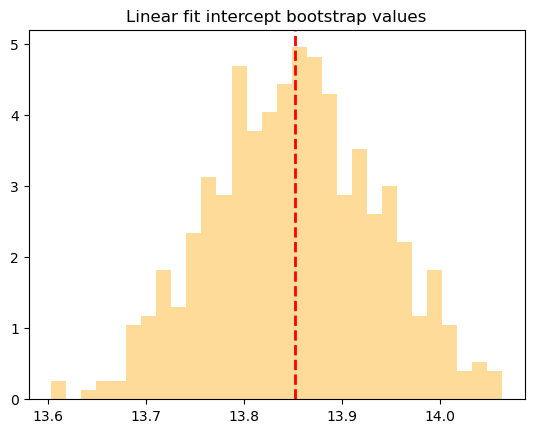

In [17]:
plt.figure()
plt.hist(ints_boot,bins=30,alpha=0.4,color='orange',density=True,label=' bootstrap')
plt.axvline(x=np.mean(ints_boot), color='red', linestyle='dashed', linewidth=2)
# plt.legend()
plt.title('Linear fit intercept bootstrap values')
plt.show()

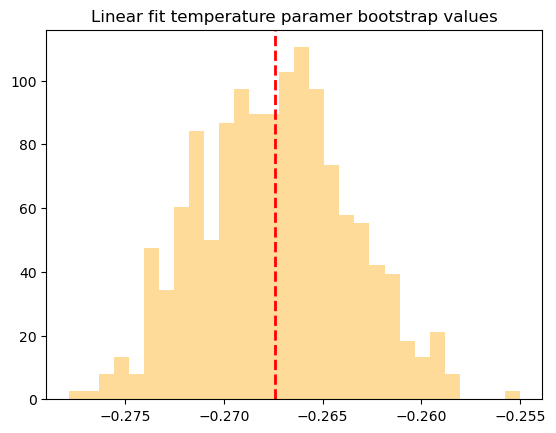

In [18]:
plt.figure()
plt.hist(tempParams_boot,bins=30,alpha=0.4,color='orange',density=True,label=' bootstrap')
plt.axvline(x=np.mean(tempParams_boot), color='red', linestyle='dashed', linewidth=2)
plt.title('Linear fit temperature paramer bootstrap values')
plt.show()

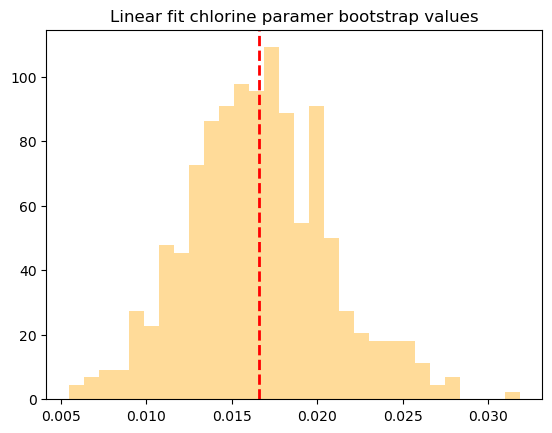

In [19]:
plt.figure()
plt.hist(chlParams_boot,bins=30,alpha=0.4,color='orange',density=True,label=' bootstrap')
plt.axvline(x=np.mean(chlParams_boot), color='red', linestyle='dashed', linewidth=2)
plt.title('Linear fit chlorine paramer bootstrap values')
plt.show()

In [20]:
x = df[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
y = df['oxygen']
x = sm.add_constant(x) # add a constant term to serve as the intercept in the linear regression model
polylinmod = sm.regression.linear_model.OLS(y, x)
polylinresults = linmod.fit()
covPolylin = linresults.cov_params()
polylinParamStdError = np.sqrt(np.diag(covLinear))

x = df[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
y = df['oxygen']
x['temperature2'] = x['temperature'] ** 2
x['temperature3'] = x['temperature'] ** 3
x = sm.add_constant(x) # add a constant term to serve as the intercept in the regression model
polylinmod = sm.regression.linear_model.OLS(y, x)
polylinresults = polylinmod.fit()
covPolylin = polylinresults.cov_params()
polylinParamStdError = np.sqrt(np.diag(covPolylin))


print(f'The standard error on the constant in the linear model is {polylinParamStdError[0]:.5f}')
print(f'The standard error on the chloride parameter in the linear model is {polylinParamStdError[1]:.5f}')
print(f'The standard error on the temperature parameter in the linear model is {polylinParamStdError[2]:.5f}')
print(f'The standard error on the temperature^2 parameter in the linear model is {polylinParamStdError[3]:.5f}')
print(f'The standard error on the temperature^3 parameter in the linear model is {polylinParamStdError[4]:.5f}')

## note, this matches the bse values printed above which are automatically calculated when calling OLS!

The standard error on the constant in the linear model is 0.12185
The standard error on the chloride parameter in the linear model is 0.00428
The standard error on the temperature parameter in the linear model is 0.03320
The standard error on the temperature^2 parameter in the linear model is 0.00258
The standard error on the temperature^3 parameter in the linear model is 0.00006


In [21]:
# polynomial model bootstrapping

def polylinBootstrap(data,ndraws=500):
    '''
    Draw from the boostrap and determining the slope and intercept for each process. 
    '''

    ints = np.zeros(ndraws)
    chlParams = np.zeros(ndraws)
    tempParams = np.zeros(ndraws)
    temp2Params = np.zeros(ndraws)
    temp3Params = np.zeros(ndraws)


    for i in range(0,ndraws):
        subsample = data.sample(n=data['chloride'].count(), replace=True)
        x = subsample[['chloride', 'temperature']] # there are two 'x' variables in this model (hence MULTIlinear regression)
        y = subsample['oxygen']
        x['temperature2'] = x['temperature'] ** 2
        x['temperature3'] = x['temperature'] ** 3
        x = sm.add_constant(x) # add a constant term to serve as the intercept in the regression model
        polylinmod = sm.regression.linear_model.OLS(y, x)
        polylinresults = polylinmod.fit()
        params = polylinresults.params

        ints[i] = params['const']
        chlParams[i] = params['chloride']
        tempParams[i] = params['temperature']
        temp2Params[i] = params['temperature2']
        temp3Params[i] = params['temperature3']

    return ints, chlParams, tempParams, temp2Params, temp3Params

In [22]:
df = pd.read_csv('concentrations.csv')
ints_polyboot, chlParams_polyboot, tempParams_polyboot, temp2Params_polyboot, temp3Params_polyboot = polylinBootstrap(df)

ci = 95
print('mean intercept (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(ints_polyboot), 
                                                       np.std(ints_polyboot,ddof=1),ci,
                                                       np.percentile(ints_polyboot, ((100-ci)/2)),
                                                       np.percentile(ints_polyboot, ((100+ci)/2))))
print('mean chlorine param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(chlParams_polyboot), 
                                                       np.std(chlParams_polyboot,ddof=1),ci,
                                                       np.percentile(chlParams_polyboot, ((100-ci)/2)),
                                                       np.percentile(chlParams_polyboot, ((100+ci)/2))))
print('mean temperature param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(tempParams_polyboot), 
                                                       np.std(tempParams_polyboot,ddof=1),ci,
                                                       np.percentile(tempParams_polyboot, ((100-ci)/2)),
                                                       np.percentile(tempParams_polyboot, ((100+ci)/2))))
print('mean temperature^2 param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(temp2Params_polyboot), 
                                                       np.std(temp2Params_polyboot,ddof=1),ci,
                                                       np.percentile(temp2Params_polyboot, ((100-ci)/2)),
                                                       np.percentile(temp2Params_polyboot, ((100+ci)/2))))
print('mean temperature^3 param (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(temp3Params_polyboot), 
                                                       np.std(temp3Params_polyboot,ddof=1),ci,
                                                       np.percentile(temp3Params_polyboot, ((100-ci)/2)),
                                                       np.percentile(temp3Params_polyboot, ((100+ci)/2))))

mean intercept (bootstrap): 13.49 +/- 0.14 (95% CI: 13.22 - 13.76)
mean chlorine param (bootstrap): 0.02 +/- 0.00 (95% CI: 0.01 - 0.03)
mean temperature param (bootstrap): -0.19 +/- 0.04 (95% CI: -0.26 - -0.12)
mean temperature^2 param (bootstrap): -0.00 +/- 0.00 (95% CI: -0.01 - 0.00)
mean temperature^3 param (bootstrap): 0.00 +/- 0.00 (95% CI: -0.00 - 0.00)


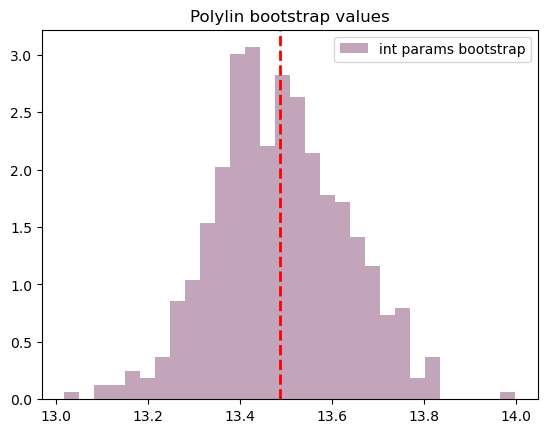

In [23]:
plt.figure()
plt.hist(ints_polyboot,bins=30,alpha=0.4,color=colors[2],density=True,label='int params bootstrap')
plt.axvline(x=np.mean(ints_polyboot), color='red', linestyle='dashed', linewidth=2)
plt.title('Polylin bootstrap values')
plt.legend()
plt.show()

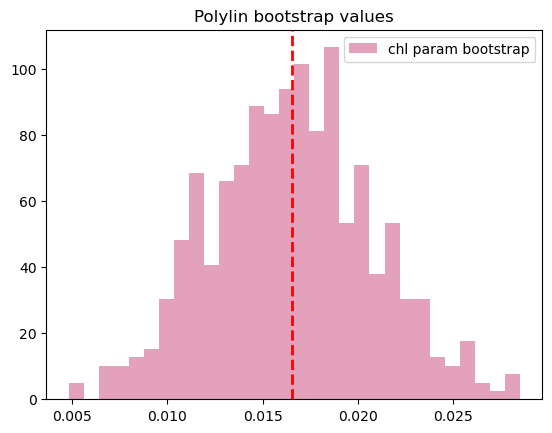

In [24]:
plt.figure()
plt.hist(chlParams_polyboot,bins=30,alpha=0.4,color=colors[4],density=True,label='chl param bootstrap')
plt.axvline(x=np.mean(chlParams_polyboot), color='red', linestyle='dashed', linewidth=2)
plt.title('Polylin bootstrap values')
plt.legend()
plt.show()

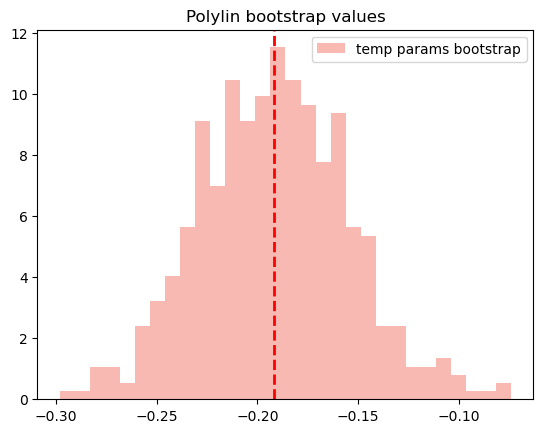

In [25]:
plt.figure()
plt.hist(tempParams_polyboot,bins=30,alpha=0.4,color=colors[6],density=True,label='temp params bootstrap')
plt.axvline(x=np.mean(tempParams_polyboot), color='red', linestyle='dashed', linewidth=2)
plt.title('Polylin bootstrap values')
plt.legend()
plt.show()

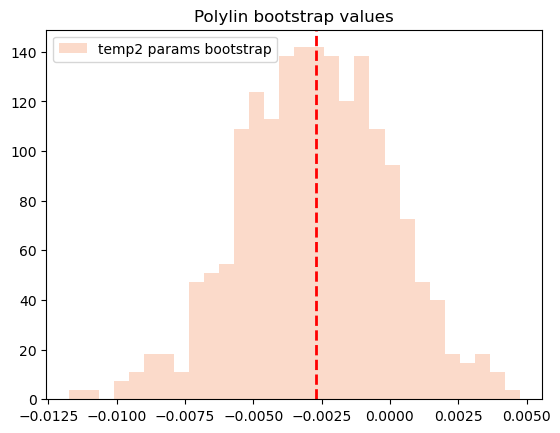

In [26]:
plt.figure()
plt.hist(temp2Params_polyboot,bins=30,alpha=0.4,color=colors[8],density=True,label='temp2 params bootstrap')
plt.axvline(x=np.mean(temp2Params_polyboot), color='red', linestyle='dashed', linewidth=2)
plt.title('Polylin bootstrap values')
plt.legend()
plt.show()

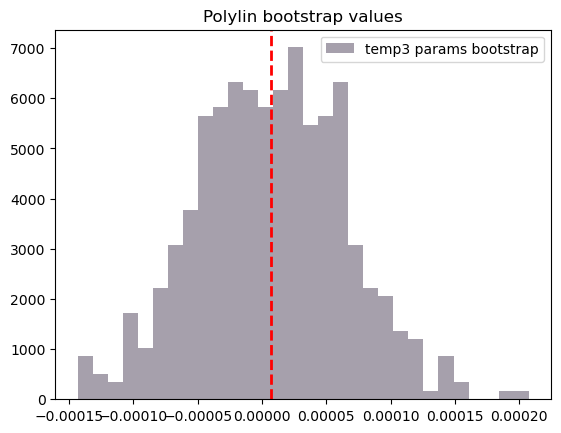

In [27]:
plt.figure()
plt.hist(temp3Params_polyboot,bins=30,alpha=0.4,color=colors[0],density=True,label='temp3 params bootstrap')
plt.axvline(x=np.mean(temp3Params_polyboot), color='red', linestyle='dashed', linewidth=2)
plt.title('Polylin bootstrap values')
plt.legend()
plt.show()

**HW-8-2**: The following model is used to represent the effect of solar radiation on the photosynthesis of aquatic plants:

$P = P_m \frac{I}{I_{sat}} e^{1-\frac{I}{I_{sat}}}$

Where $P$ is the photosynthesis rate (mg m$^{−3}$ d$^{−1}$), $P_m$ is the maximum photosynthesis rate (mg m$^{−3}$ d$^{−1}$), $I$ is the solar radiation ($\mu$ E m$^{−2}$ m$^{−2}$ s$^{−1}$), and $I_{sat}$ is the optimal solar radiation ($\mu$ E m$^{−2}$ m$^{−2}$ s$^{−1}$). 

a) Use nonlinear regression to find best-fit parameters for $I_{sat}$ and $P_m$ based on the following data. Compute the $R^2$ and provide an estimate of the standard error $s$ of the model.


In [28]:
I = np.array([50, 80,100, 130,150,200,220,250,280,350,400,450,550,600,650,700,800])
P = np.array([99,177,183, 202,224,248,245,229,223,219,199,173,142,140,101, 72, 51])
df = pd.DataFrame({'I': I, 'P': P})

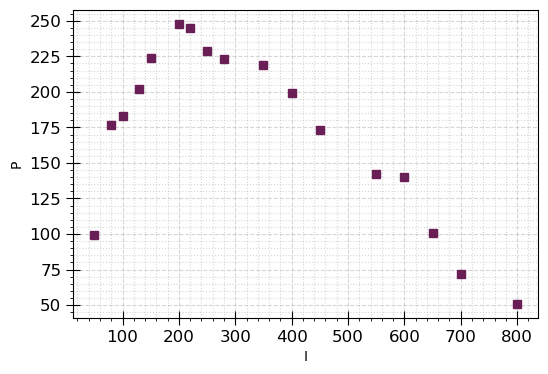

In [29]:
fig, ax  = plt.subplots(figsize=(6,4))

ax.plot(I, P, marker='s', mec=colors[2], mfc=colors[2], linestyle='none')
ax.set_xlabel('I')  
ax.set_ylabel('P')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
plt.tick_params(direction='inout', length=10, labelsize=12)
                
plt.show()

In [30]:
def model(params,I,P):
    '''...
    '''
    # params[0] = Pm
    # params[1] = Isat
    
    return np.sum((P-params[0]*I*np.exp(1-I/params[1])/params[1])**2)

In [31]:
results = scipy.optimize.minimize(model,args=(I,P),x0=(239,223),method='BFGS')
# print(results)
print(f'Pm={results.x[0]:8.5f}, Isat={results.x[1]:8.5f}')

Pm=239.11731, Isat=223.90333


In [32]:
def just_model(I,Pm,Isat):
    return Pm*I/Isat*np.exp(1-I/Isat)

In [33]:
results_nonlin = scipy.optimize.curve_fit(just_model,xdata=I,p0=(200,200), ydata=P) # just_model is the function we want to fit to (not residuals)
parameters = results_nonlin[0]
print(f'Pm = {parameters[0]:8.5f}, Isat = {parameters[1]:8.5f}')

Pm = 239.11731, Isat = 223.90333


In [34]:
# Compute R^2 of the linear fit
print('Fit quality data for the linear fit')
St_linear = np.sum((P - np.mean(P)) ** 2)
# Sr_linear = np.sum(linresults.resid ** 2)
Sr_linear = model((results.x[0],results.x[1]),I,P) # the model function finds the sum squared of the residues already!

# Linear R^2
r2_linear = (St_linear - Sr_linear) / St_linear

# Compute the error in the estimate
# ChatGPT used to adapt this code
s_linear = np.sqrt(Sr_linear / (len(y) - x.shape[1]))

print(f'Linear R^2 = {r2_linear:.3f}')
print(f'Error in the estimate (linear) = {s_linear:.3f}')

Fit quality data for the linear fit
Linear R^2 = 0.968
Error in the estimate (linear) = 2.530


From the [scipy.optimize.curve_fit documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html): pcov is "the estimated approximate covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters, use perr = np.sqrt(np.diag(pcov)). Note that the relationship between cov and parameter error estimates is derived based on a linear approximation to the model function around the optimum [1]. When this approximation becomes inaccurate, cov may not provide an accurate measure of uncertainty."

In [35]:
popt = results_nonlin[0]
pcov = results_nonlin[1]
perr = np.sqrt(np.diag(pcov))
print(f'One standard deviation error on Pm is {perr[0]:.3f}')
print(f'One standard deviation error on Isat is {perr[1]:.3f}')

One standard deviation error on Pm is 3.764
One standard deviation error on Isat is 4.830


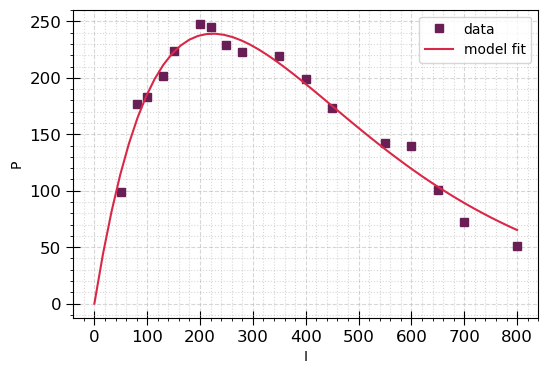

In [36]:
fig, ax  = plt.subplots(figsize=(6,4))
colors=sns.color_palette("rocket",10)

Idata = np.linspace(0,800)
ax.plot(I, P, marker='s', mec=colors[2], mfc=colors[2], linestyle='none', label='data')
ax.plot(Idata,results.x[0]*Idata*np.exp(1-Idata/results.x[1])/results.x[1],color=colors[5], label='model fit')
ax.set_xlabel('I')  
ax.set_ylabel('P')

ax.grid(True, linestyle='--', alpha=0.5)  
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)
plt.tick_params(direction='inout', length=10, labelsize=12)

plt.legend()
plt.show()

In [37]:
# compute the R2 and estimate the standard error s of the model

# Compute R^2 in the nonlinear model
print('Fit quality data using the original nonlinear model')
St_nonlinear = np.sum((P - np.mean(P)) ** 2)
Sr_nonlinear = np.sum((P - (results.x[0]*I*np.exp(1-I/results.x[1])/results.x[1])) ** 2)
# Nonlinear R^2
r2_nonlinear = (St_nonlinear - Sr_nonlinear) / St_nonlinear

# Compute the error in the estimate (nonlinear)
s_nonlinear = np.sqrt(Sr_nonlinear / (len(I) - 2))

print(f'Nonlinear R^2 = {r2_nonlinear}')
print(f'Error in the estimate (nonlinear) = {s_nonlinear}')

plt.show()

Fit quality data using the original nonlinear model
Nonlinear R^2 = 0.9682957375455042
Error in the estimate (nonlinear) = 11.315463551033051



b) Compare the errors in $I_{sat}$ and $P_m$ from `curve_fit` and from bootstrapping the data. Do the results from bootstrapping suggest the errors in the parameters are normally distributed? 

In [38]:
def just_model(I,Pm,Isat):
    return Pm*I/Isat*np.exp(1-I/Isat)

In [39]:
results_nonlin = scipy.optimize.curve_fit(just_model,xdata=I,p0=(200,200), ydata=P) # just_model is the function we want to fit to (not residuals)
parameters = results_nonlin[0]
print(f'Pm = {parameters[0]:8.5f}, Isat = {parameters[1]:8.5f}')

Pm = 239.11731, Isat = 223.90333


In [40]:
print(results)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1920.5957306213627
        x: [ 2.391e+02  2.239e+02]
      nit: 7
      jac: [ 4.578e-05  1.068e-04]
 hess_inv: [[ 1.799e-02 -5.234e-03]
            [-5.234e-03  2.497e-03]]
     nfev: 123
     njev: 37


In [41]:
Pm,Isat = results_nonlin[0]
error_nonlin = results_nonlin[1]
print(error_nonlin)

[[14.16745714 -5.19096988]
 [-5.19096988 23.32610556]]


In [42]:
print("nonlinear fits") 
print(f'Pm is:   {Pm:.3f} +/- {np.sqrt(error_nonlin[0,0]):.5f}')
print(f'Isat is: {Isat:.3f} +/- {np.sqrt(error_nonlin[1,1]):.5f}')

nonlinear fits
Pm is:   239.117 +/- 3.76397
Isat is: 223.903 +/- 4.82971


In [43]:
def draw_from_bootstrap(data,ndraws=500):
    '''
    Draw from the boostrap and determining the slope and intercept for each process. 
    '''

    Imin = data['I'].min()
    Imax = data['I'].max()

    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(data['I'], data['P'], alpha=0.5, label='raw data')

    # initializing outputs
    Pm = np.zeros(ndraws)
    Isat = np.zeros(ndraws)

    for i in range(0,ndraws):
        subsample = data.sample(n=data.I.count(), replace=True)
        results = scipy.optimize.curve_fit(just_model,xdata=subsample['I'],ydata=subsample['P'],p0=(200,200)) # just_model is the function we want to fit to (not residuals)
        params = results[0]
        Pm[i] = params[0]
        Isat[i] = params[1]

        Idata = np.linspace(Imin,Imax,500)
        P_fit = params[0]*Idata/params[1]*np.exp(1-Idata/params[1])
        
        ax.plot(Idata, P_fit, linewidth=2,  color='b', alpha=0.2)

    return Pm, Isat

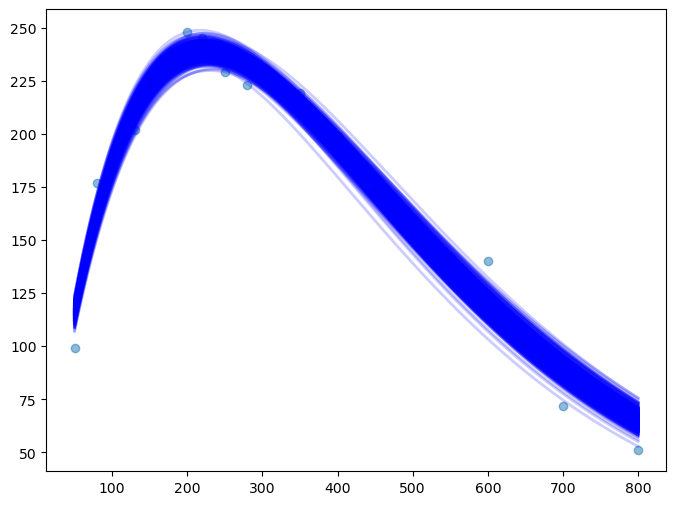

In [44]:
Pms_boot, Isats_boot = draw_from_bootstrap(df)

mean Pm (bootstrap): 239.04 +/- 3.09 (95% CI: 232.96 - 245.11)
mean Isat (bootstrap): 223.99 +/- 5.10 (95% CI: 215.21 - 234.10)


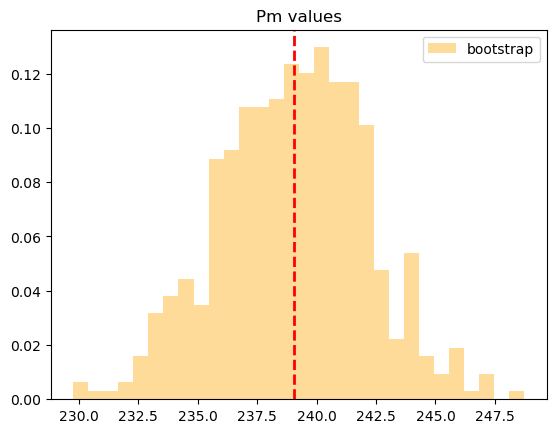

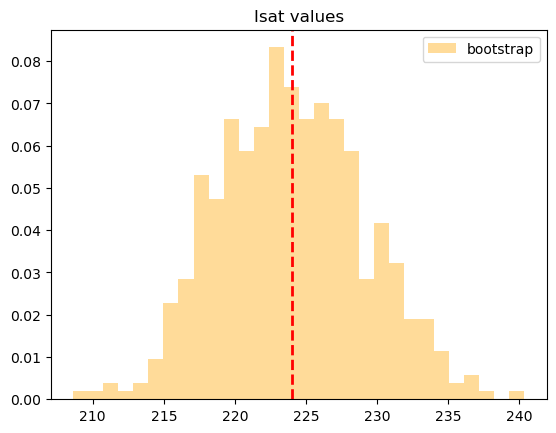

In [45]:
ci = 95

print('mean Pm (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(Pms_boot), 
                                                       np.std(Pms_boot,ddof=1),ci,
                                                       np.percentile(Pms_boot, ((100-ci)/2)),
                                                       np.percentile(Pms_boot, ((100+ci)/2))))
print('mean Isat (bootstrap): {:.2f} +/- {:.2f} ({:2d}% CI: {:.2f} - {:.2f})'.format(np.mean(Isats_boot), 
                                                       np.std(Isats_boot,ddof=1),ci,
                                                       np.percentile(Isats_boot, ((100-ci)/2)),
                                                       np.percentile(Isats_boot, ((100+ci)/2))))

plt.figure()
plt.hist(Pms_boot,bins=30,alpha=0.4,color='orange',density=True,label='bootstrap')
plt.axvline(x=np.mean(Pms_boot), color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Pm values')
plt.show()

plt.figure()
plt.hist(Isats_boot,bins=30,alpha=0.4,color='orange',density=True,label='bootstrap')
plt.axvline(x=np.mean(Isats_boot), color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Isat values')
plt.show()

Yes, the results from bootstrapping suggest the errors in the parameters are normally distributed. IN the two graphs directly above, you can see the bins of values of the Pm and Isat parameters appear to be equally distributed on the right and left side of the average (mean) values, indicating that they're normally distributed.